# Imports

In [423]:
import json
import random
import networkx as nx
from matplotlib import pyplot as plt
from networkx.readwrite import json_graph

COLOR_BG = "#a8dadc"
COLOR_FG = "#457b9d"
SIZE_BG_NODES = 800
SIZE_FG_NODES = 2400
EDGE_BG_WEIGHT = 4
EDGE_FG_WEIGHT = 24
MATRIX_SIDE = 10
NO_FG_NODES = 20
FIG_SIZE = (12, 12)

# Activity 2

## 2.1 Sub-activity: Graph creation

### Task 1

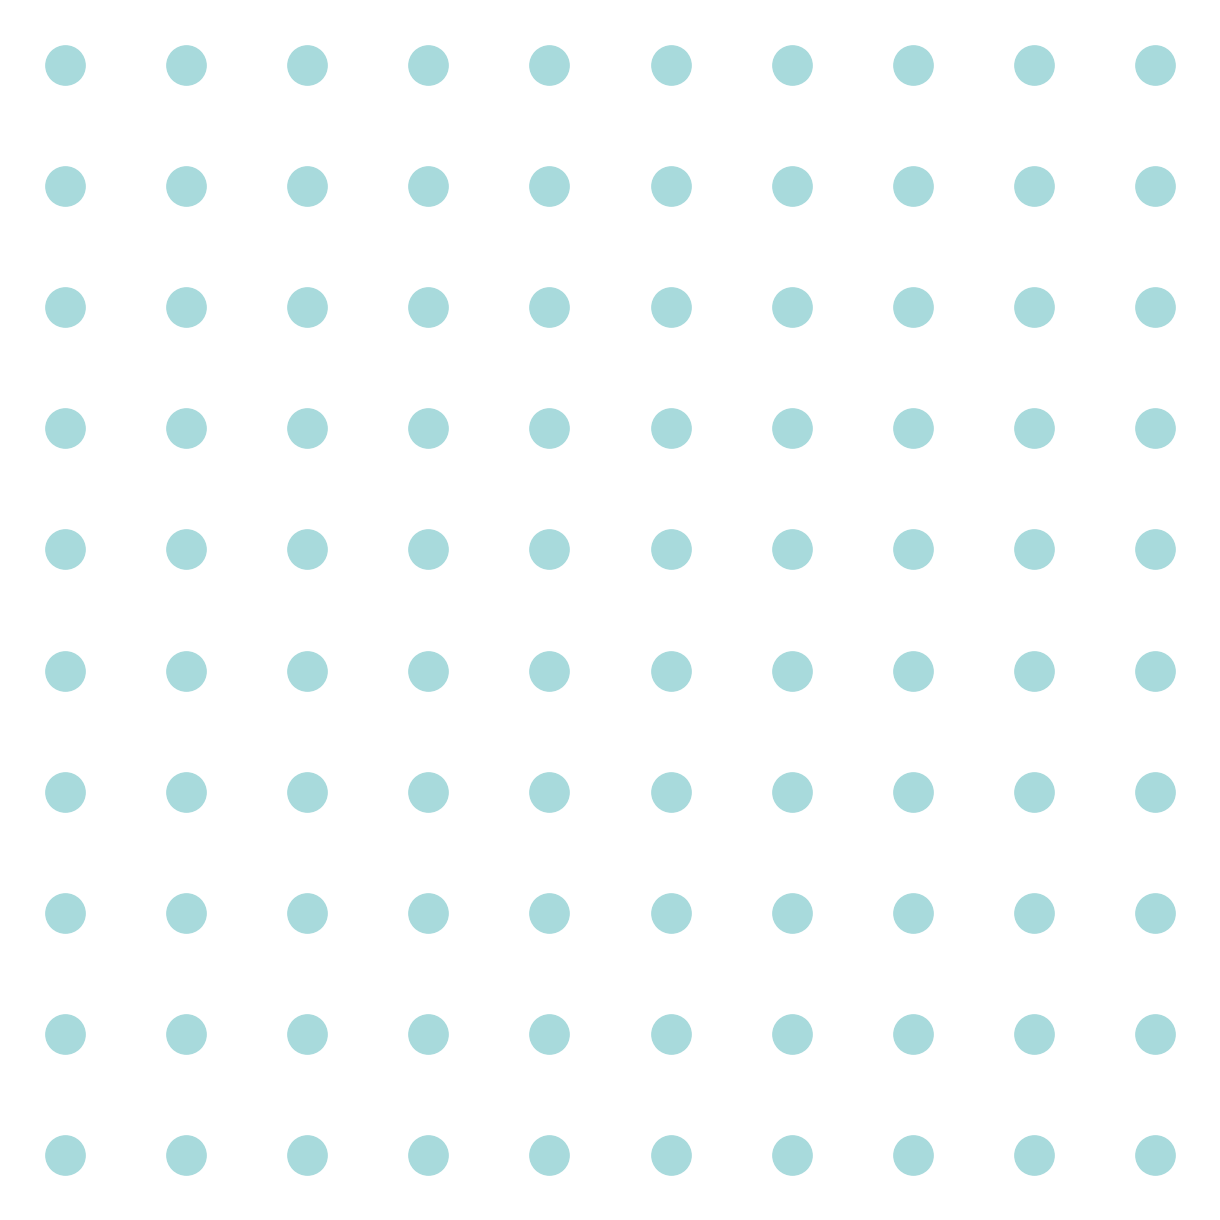

In [424]:
# Create a graph
G = nx.Graph()

# Get the positions of the nodes
pos = {(x,y):(x,y) for x in range(MATRIX_SIDE) for y in range(MATRIX_SIDE)}

# Add the nodes to the graph
G.add_nodes_from(pos.keys(), color = COLOR_BG, size = SIZE_BG_NODES, node_type = "bg")

# Set the figure size
plt.figure(figsize = FIG_SIZE)

# Draw the grid graph
nx.draw(G, pos=pos, node_color = COLOR_BG, node_size = SIZE_BG_NODES)

### Task 2

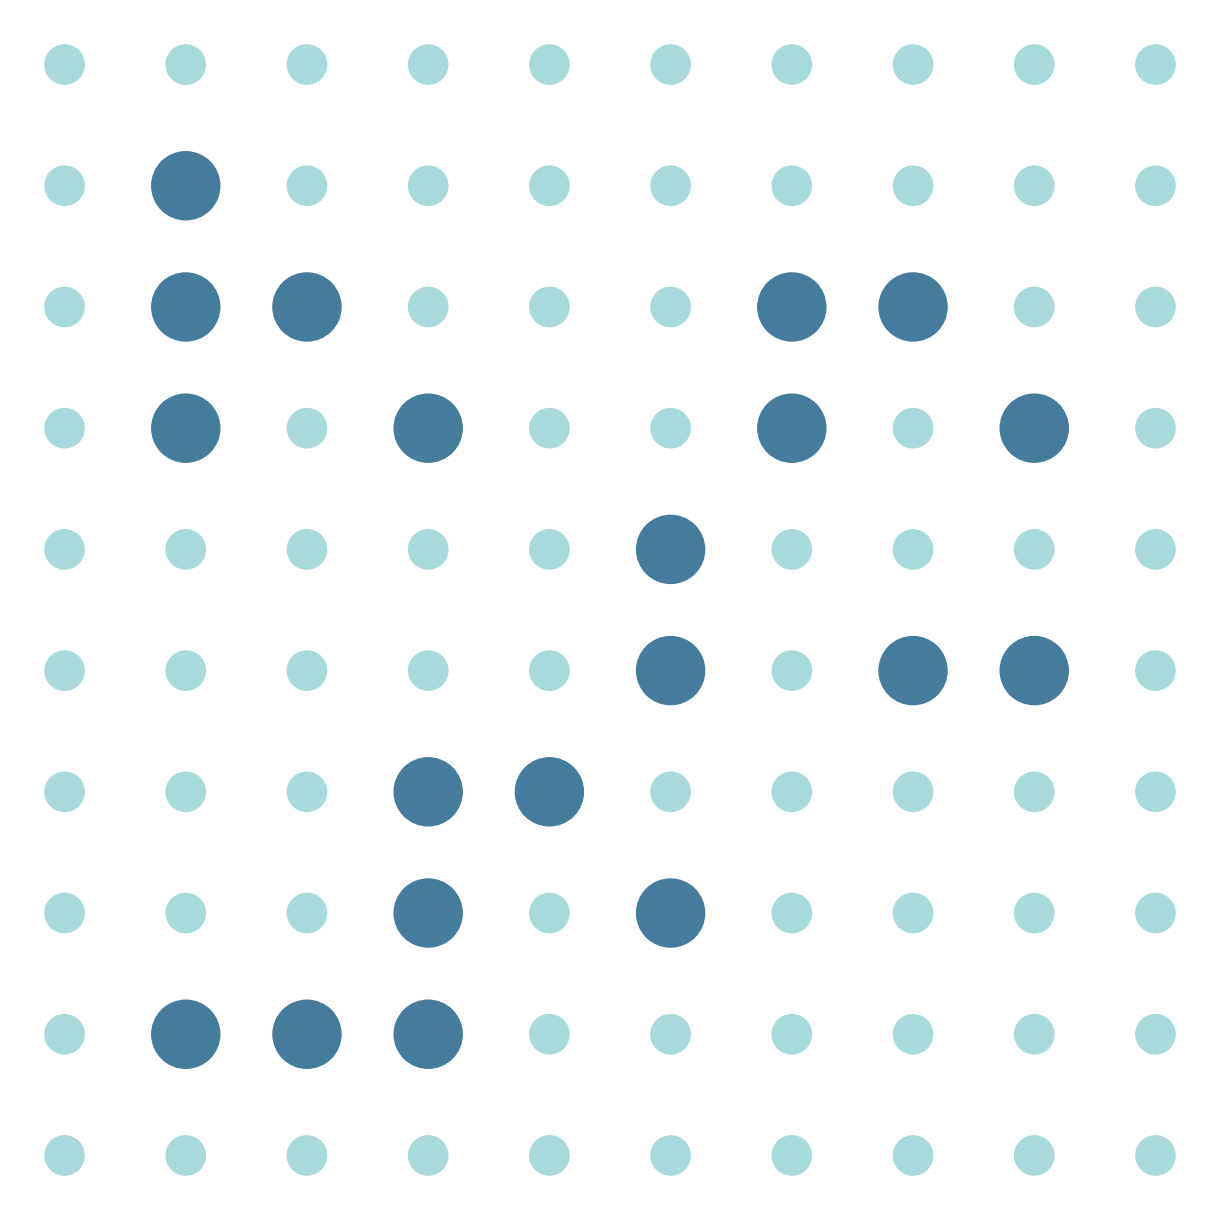

In [425]:

# Get the possible positions of the foreground nodes
possible_positions = {(x,y):(x,y) for x in range(1, MATRIX_SIDE-1) for y in range(1, MATRIX_SIDE-1)}

# Choose the positions ramdomly by positions
chosen_positions = random.sample(list(possible_positions.keys()), NO_FG_NODES)

# Add the foreground nodes with attributes to the graph
G.add_nodes_from(chosen_positions, color = COLOR_FG, size = SIZE_FG_NODES, node_type = "fg")

node_size = [size[1] for size in G.nodes(data = "size")]
node_color = [color[1] for color in G.nodes(data = "color")]

# Draw the foreground nodes
plt.figure(figsize = FIG_SIZE)
nx.draw(G, pos=pos, node_color = node_color, node_size = node_size)

### Task 3

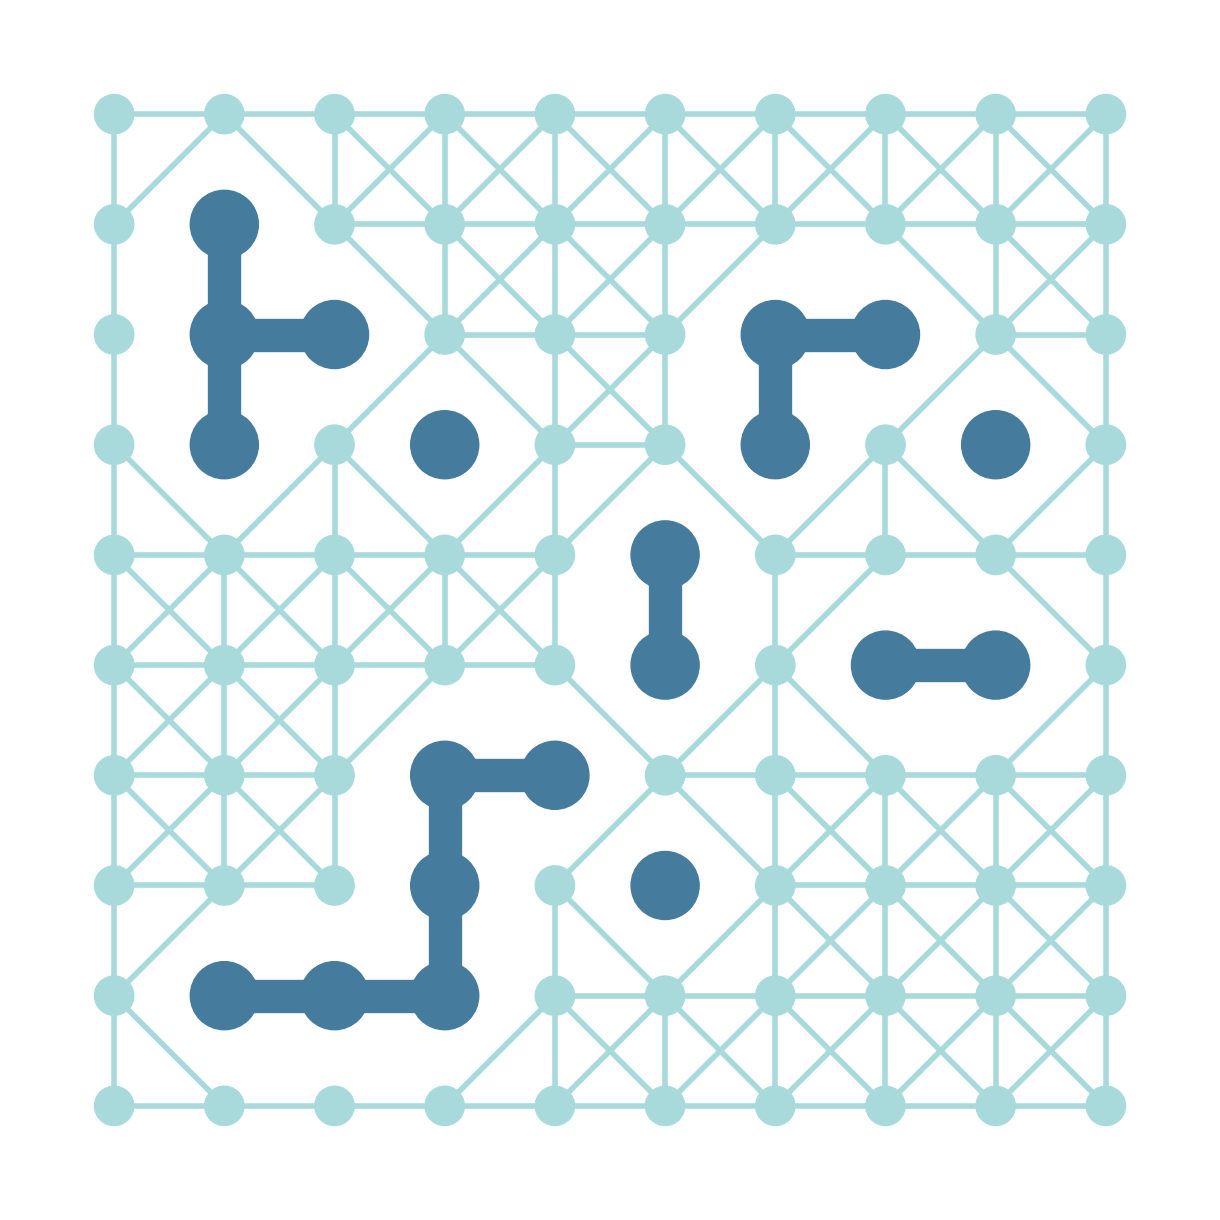

In [426]:
G_nodes = [node for node in G.nodes()]
remained_node = [G_node for G_node in G_nodes if G_node not in chosen_positions]

FG_edges = []
BG_edges = []
for i in range(-1,2):
    for j in range(-1,2):
        if i == 0 and j == 0: continue
        else:
            for node in remained_node:
                if ((node[0]+i,node[1]+j) not in chosen_positions) and ((node[0]+i,node[1]+j) in G_nodes):
                    BG_edges.append((node, (node[0]+i,node[1]+j)))

            for node in chosen_positions:
                if (node[0]+i,node[1]+j) not in remained_node:
                    if i == 0 and j == 1:
                        FG_edges.append((node, (node[0]+i,node[1]+j)))
                    elif i == 0 and j == -1:                
                        FG_edges.append((node, (node[0]+i,node[1]+j)))
                    elif i == 1 and j == 0:
                        FG_edges.append((node, (node[0]+i,node[1]+j)))
                    elif i == -1 and j == 0:
                        FG_edges.append((node, (node[0]+i,node[1]+j)))

# Add the edges to the graph
G.add_edges_from(FG_edges, color = COLOR_FG, weight = EDGE_FG_WEIGHT)
G.add_edges_from(BG_edges, color = COLOR_BG, weight = EDGE_BG_WEIGHT)

edge_color = [color[2] for color in G.edges(data = "color")]
edge_weight = [weight[2] for weight in G.edges(data = "weight")]

plt.figure(figsize = FIG_SIZE)
nx.draw(G, pos=pos, node_color = node_color, node_size = node_size)
nx.draw_networkx_edges(G, pos=pos, edge_color = edge_color, width = edge_weight)

## 2.2 Sub-activity: Graph manipulation and output

### Task 4

In [427]:
print("The infomation about the graph: {}. \n".format(nx.info(G)))
print("The density of the graph is: {}. \n".format(nx.density(G)))
for key, value in nx.degree_centrality(G).items():
    print("The degree centrality of node {} is: {}.".format(key, value))

The infomation about the graph: Graph with 100 nodes and 216 edges. 

The density of the graph is: 0.04363636363636364. 

The degree centrality of node (0, 0) is: 0.020202020202020204.
The degree centrality of node (0, 1) is: 0.04040404040404041.
The degree centrality of node (0, 2) is: 0.04040404040404041.
The degree centrality of node (0, 3) is: 0.05050505050505051.
The degree centrality of node (0, 4) is: 0.05050505050505051.
The degree centrality of node (0, 5) is: 0.04040404040404041.
The degree centrality of node (0, 6) is: 0.030303030303030304.
The degree centrality of node (0, 7) is: 0.020202020202020204.
The degree centrality of node (0, 8) is: 0.030303030303030304.
The degree centrality of node (0, 9) is: 0.020202020202020204.
The degree centrality of node (1, 0) is: 0.030303030303030304.
The degree centrality of node (1, 1) is: 0.010101010101010102.
The degree centrality of node (1, 2) is: 0.06060606060606061.
The degree centrality of node (1, 3) is: 0.08080808080808081.
The

/var/folders/dn/rwz32gqj5951m0mt9y7smnn80000gn/T/ipykernel_84082/2215094568.py:1: DeprecationWarning: info is deprecated and will be removed in version 3.0.

  print("The infomation about the graph: {}. \n".format(nx.info(G)))


### Task 5

In [428]:
# Save the graph as a JSON file named "graph.json" to the current directory
with open ("graph.json", "w") as f:
    json.dump(json_graph.node_link_data(G), f, indent = 4)